# Phase 2: Exploratory Data Analysis:

## Shreya Kumar (861279837)

In [2]:
# importing basic packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#importing CSVs

academy_df = pd.read_csv('academy_awards.csv')
imdb_df = pd.read_csv('imdb_dataset.csv')
df = pd.read_csv('imdb_1000.csv')

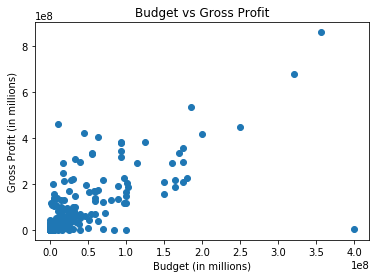

In [188]:
fig1=plt.figure()
plt.scatter(imdb_df['Budget_val'], imdb_df['Gross_USA_val'])
axis1 = fig1.gca() #get current axis
axis1.set_title('Budget vs Gross Profit')
axis1.set_xlabel('Budget (in millions)')
axis1.set_ylabel('Gross Profit (in millions)')
fig1.canvas.draw()

### Analysis:

I wanted to analyze the data to see whether movies that had a higher budget also produced a higher gross profit. However based off of this scatterplot there isn't a very strong correlation if any. This means smaller productions can gross larger profits if the content appeals to the masses.

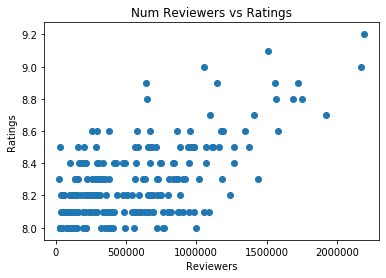

In [189]:
fig1=plt.figure()
plt.scatter(imdb_df['Reviewers'], imdb_df['IMDB rating'])
axis1 = fig1.gca() #get current axis
axis1.set_title('Num Reviewers vs Ratings')
axis1.set_xlabel('Reviewers')
axis1.set_ylabel('Ratings')
fig1.canvas.draw()

### Analysis:

Over here I wanted to see whether a larger number of reviewers for a movie resulted in higher or lower ratings. The reason for this was because I wanted to see if people tended to give reviews more when they felt negatively about a film, or when they felt positively about a film. The scatter plot doesn't show a very tight correlation but I think that can be attributed to the fact that the data set was large. However, despite the loose correlation we can see a positive relationship between the number of reviewers and the movie ratings. This would support the theory the people tend to post more reviews when they liked the movie/when the movie was good and popular.

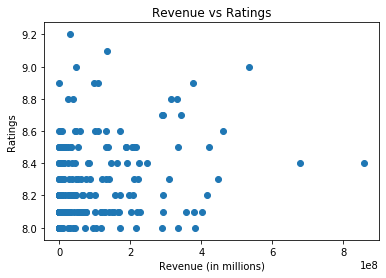

In [205]:
fig1=plt.figure()
plt.scatter(imdb_df['Gross_USA_val'], imdb_df['IMDB rating'])
axis1 = fig1.gca() #get current axis
axis1.set_title('Revenue vs Ratings')
axis1.set_xlabel('Revenue (in millions)')
axis1.set_ylabel('Ratings')
fig1.canvas.draw()

### Analysis:

The purpose of this scatterplot was to see what kind of correlation existed between the overall revenue of a film and the rating it received. My assumption was that movies with higher ratings also had higher gross profits because movies that performed well would receive high ratings and more people would have watched them. Surprisingly, however, as per this scatterplot no such relationship can be established. The data is kind of just scattered so a conclusive assumption about the relationship between revenue and ratings cannot be made.

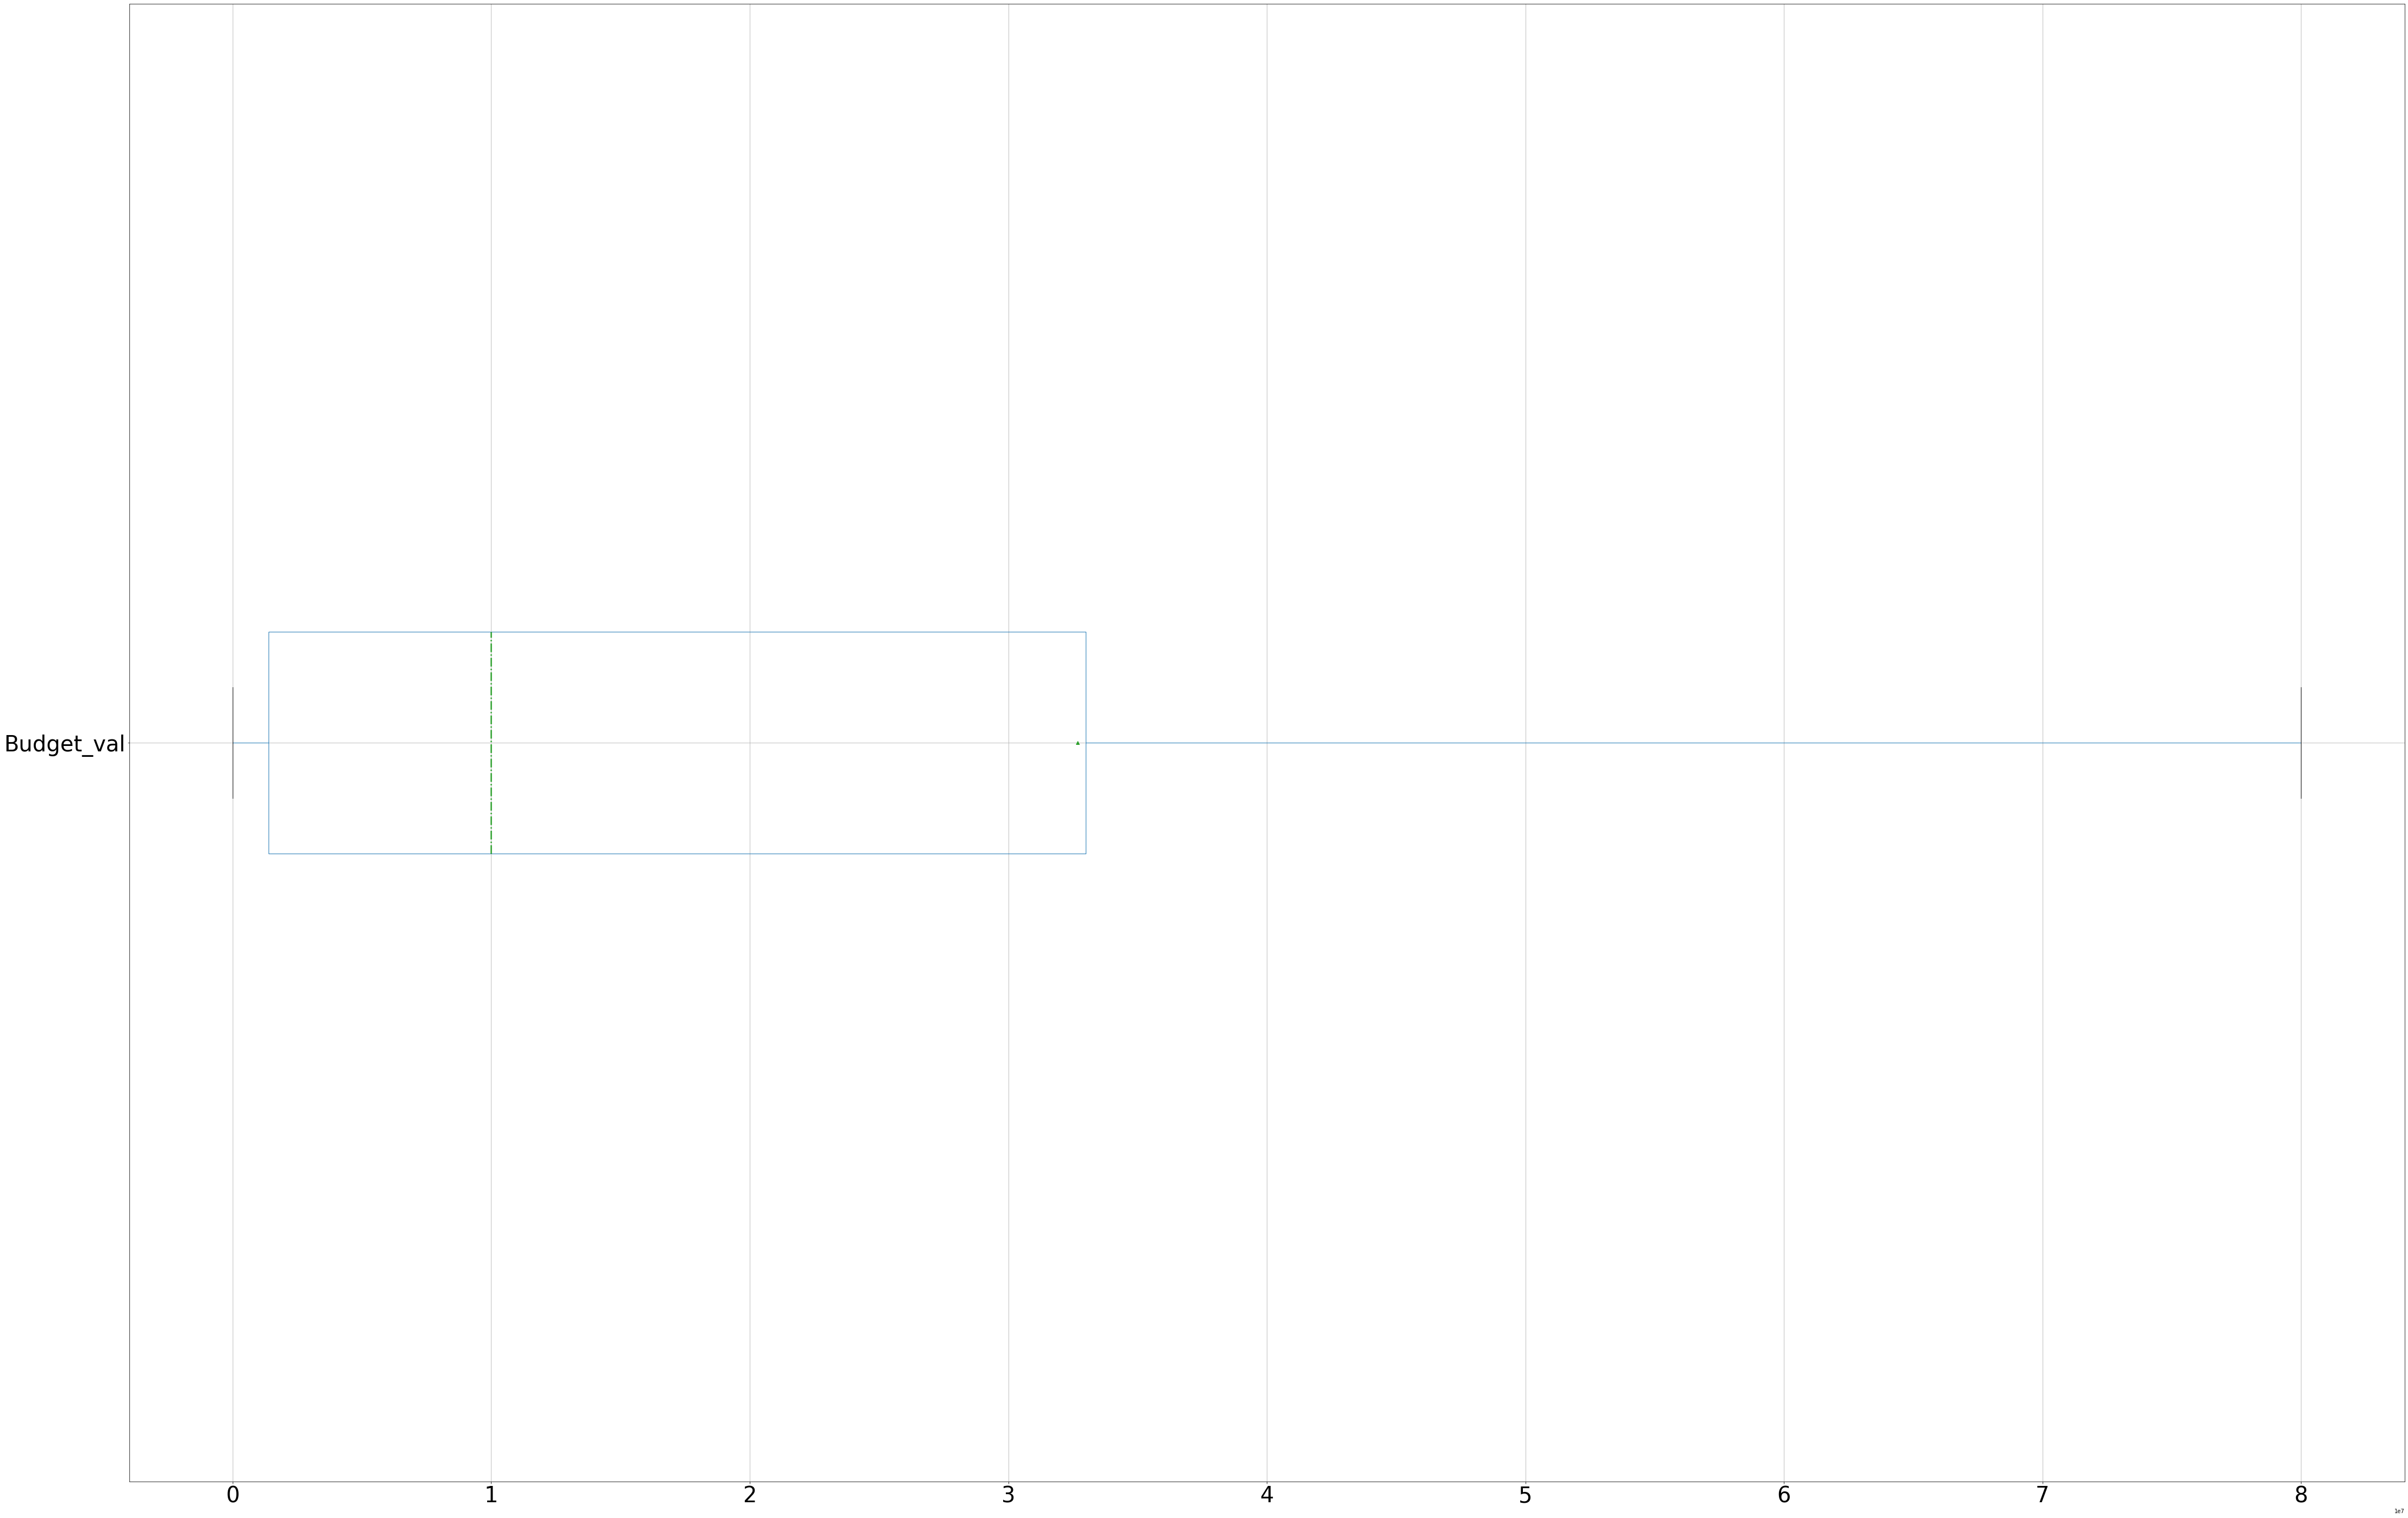

In [214]:
medianprops = dict(linestyle='-.', linewidth=2.5, color="red")
imdb_df.boxplot(column = ['Budget_val'], vert = False, fontsize = 40, figsize = (75,50), showfliers = False, showmeans=True, medianprops = medianprops)

### Analysis:

I wanted to see what the budget for the top 250 films on IMDB were so to see that distribution I created the boxplot. From this boxplot we can see that the median budget for films, which can be identified by the vertical line going through the box, was 1 million dollars. We can also see that as per the data, any budget larger than 8 million dollars would qualify as an outlier. For the sake of making this boxplot readable, I had to keep out the outliers. 


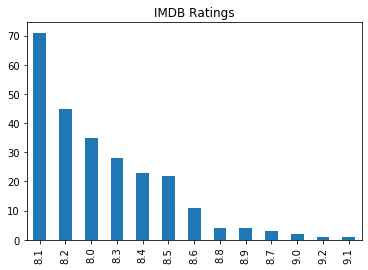

In [228]:
imdb_df['IMDB rating'].value_counts().sort_values(ascending=False).plot(kind='bar', title='IMDB Ratings')

### Analysis:

This bar chart helps us see what the distribution of ratings for the top 250 IMDB films are. The histogram indicates that 50% the movie ratings fall between 8.0 and 8.2. The data is very obviously skewed to the right.

Text(0, 0.5, 'Frequency')

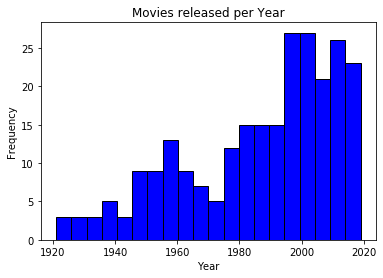

In [238]:
plt.hist(imdb_df['Year released'], color = 'blue', edgecolor = 'black',
         bins = int(100/5))
plt.title('Movies released per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

### Analysis:

This histogram helps us visualize the distribution of film releases over the years. As per this histogram, a large chink of films were produced between 1970 and 2020. This can be attributed towards the fact that prior to the movie production on a large scale was difficult so fewer movies were produced per year. The movie releases per year data is very obviously skewed to the left.

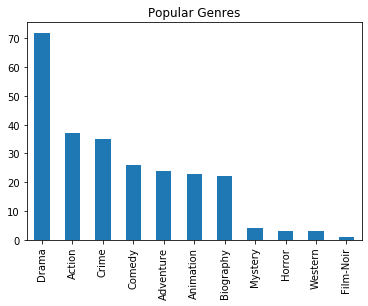

In [235]:
imdb_df['Genre1'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Popular Genres')

### Analysis:

This bar chart helps us see what the most popular genres are among the top 250 rated IMDB films. As per this chart, the most popular is drama by far while the least popular is film-noir.

In [193]:
imdbList = imdb_df['Name of the movie']

academy_df = academy_df[academy_df['entity'].isin(imdbList)]

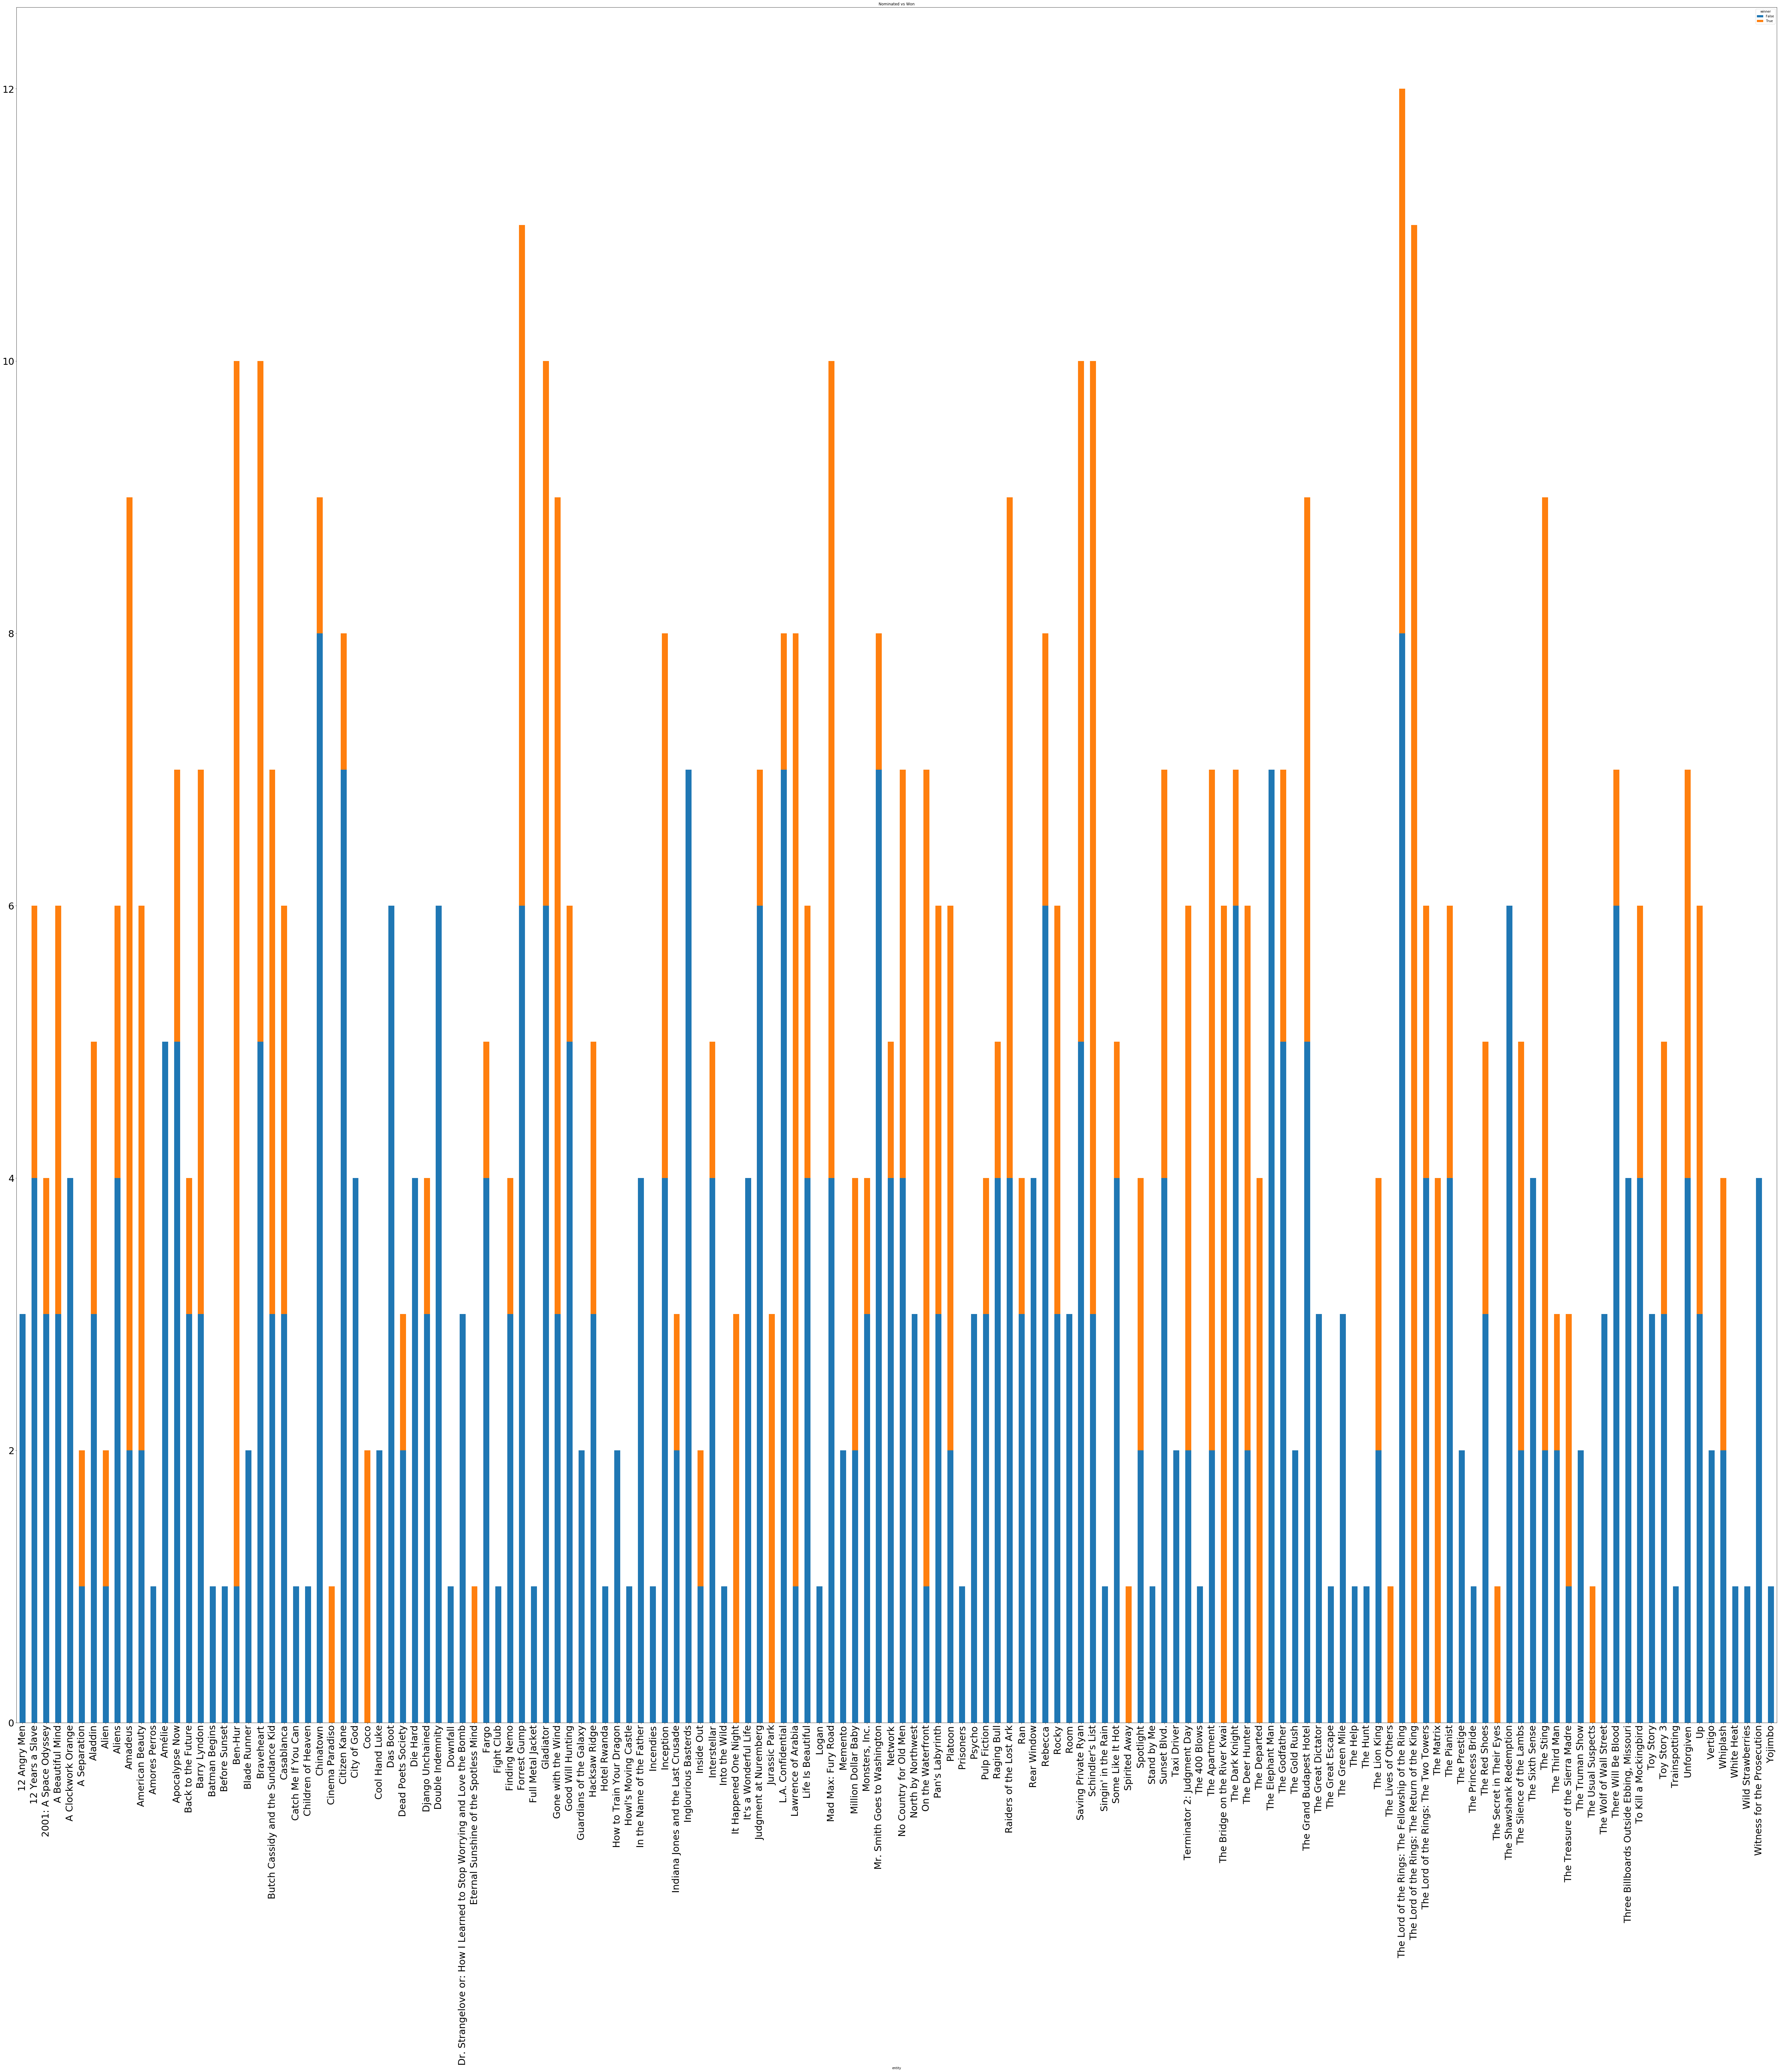

In [201]:
df1=academy_df.groupby(['entity','winner'])['entity'].count().unstack().fillna(0)
display(df1.plot(kind='bar',stacked=True, title='Nominated vs Won', legend=True, figsize=(100,100), fontsize=30))

In [195]:
print("The number of top rated movies actually nominated for Academy Award: ",len(academy_df['entity'].unique()))
print("The number of top rated movies: ", len(imdb_df['Name of the movie']))

The number of top rated movies actually nominated for Academy Award:  148
The number of top rated movies:  250


### Analysis:

The purpose of this stacked bar chart was to see the following: how many of the top rated IMDB films were nominated for the academy awards and how many of the films that were nominated actually won an Academy Award. From this stacked bar chart we see that of the 250 IMDB Top Rated films, 148 of them made it into nominations for the Academy Awards. The blue stack indicates the number of Academy Awards the film was nominated for but didn't win and the orange indicates the number of Academy Awards that the films were nominated for AND won. A lot of films didn't actually win the awards they were nominated for. The few films that did exceptionally well and won every award they were nominated for were: Cinema Paradiso, Coco, Eternal Sunshine of the Spotless Mind, It Happened One Night, Jurassic Park, Spirited Away, The Bridge on the River Kwai, The Departed, The Lives of Others, The Matrix, The Secret in Their Eyes and The Usual Suspects.

Text(0, 0.5, 'Revenue (in Millions)')

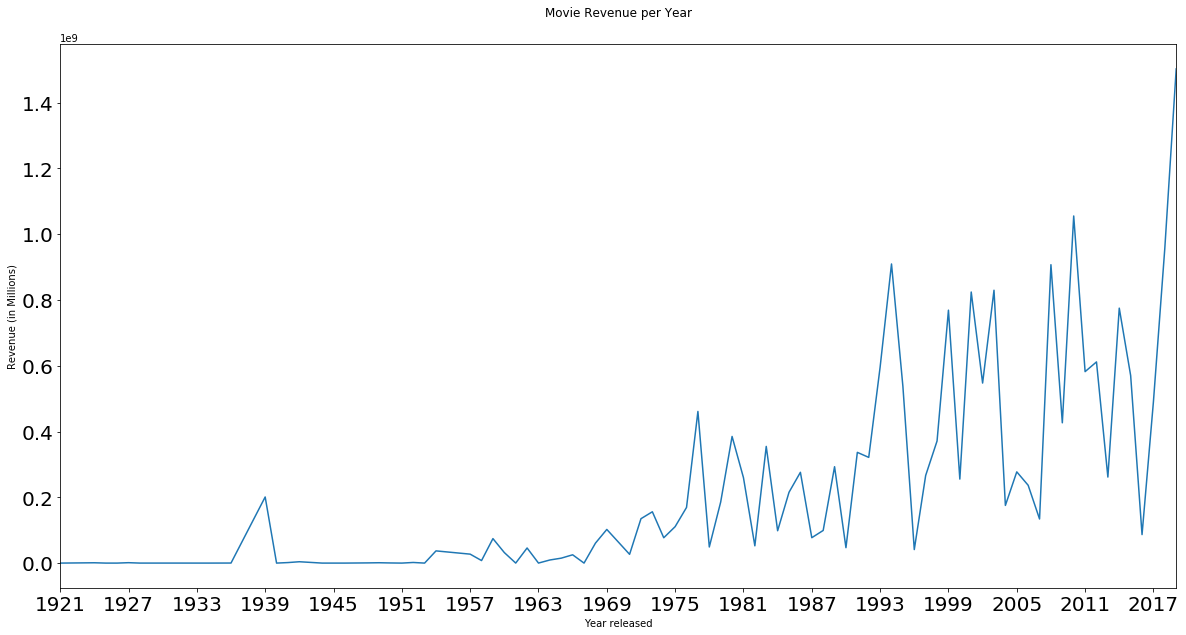

In [197]:
movies_revenue = imdb_df.groupby('Year released')['Gross_USA_val'].sum()
ax = movies_revenue.plot.line(figsize=(20,10), fontsize=20)
plt.xlim([imdb_df['Year released'].min(), imdb_df['Year released'].max()])
plt.xticks(np.arange(imdb_df['Year released'].min(), imdb_df['Year released'].max(), 6.0))
ax.set_title('Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)')

### Analysis:

This plot line, again is not smooth, but shows us how movie revenues has positively increased over time as well. This can be attributed to the fact that as media became more easily accessible over time, more people were able to purchase DVDs or tickets for the movie which led to higher revenues.

KeyError: nan

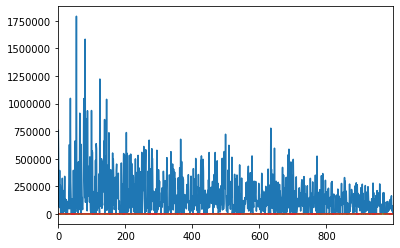

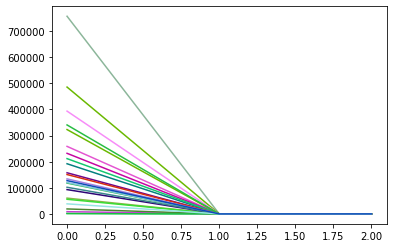

In [10]:
from pandas.plotting import parallel_coordinates
data = df[['Votes', 'Rating', 'Revenue (Millions)', 'Metascore']].copy()
data.columns=["0", "3", "5","10"]
data.plot(legend=False)
plt.figure()
parallel_coordinates(data, "10")